# Chapter 8. Exploratory data analysis
## Notebook for Python

In [1]:
!pip3 install pandas matplotlib seaborn geopandas 
!pip3 install scikit-learn scipy bioinfokit 
!pip3 install descartes

     |████████████████████████████████| 994 kB 34.8 MB/s eta 0:00:01
     |████████████████████████████████| 1.0 MB 112.7 MB/s eta 0:00:01
     |████████████████████████████████| 6.6 MB 125.8 MB/s eta 0:00:01
     |████████████████████████████████| 15.4 MB 73.2 MB/s eta 0:00:01
     |████████████████████████████████| 82 kB 926 kB/s eta 0:00:011
     |████████████████████████████████| 9.4 MB 78.2 MB/s eta 0:00:01
     |████████████████████████████████| 231 kB 158.2 MB/s eta 0:00:01
  Created wheel for bioinfokit: filename=bioinfokit-2.0.4-py3-none-any.whl size=56004 sha256=8c818e5e3fec5d253d6b4b9bac5687736289d4ed59279a0fc583ca5057ef815f
  Stored in directory: /home/wva/.cache/pip/wheels/1b/d6/92/20e4b1479eec88e4965412e8d97ad3b750d10d7cb7b0975da3
  Created wheel for adjustText: filename=adjustText-0.7.3-py3-none-any.whl size=7095 sha256=8335f4dfd95cc795c55a675eef4f1892af203490382703e607dfb9cab01851b6
  Stored in directory: /home/wva/.cache/pip/wheels/06/b2/e0/b239bd2c0ff89b98c4f0c86a63e7

In [2]:
%matplotlib inline
# General packages
import itertools
import pandas as pd
import numpy as np
# Packages for visualizing
import matplotlib.pyplot as plt
import seaborn as sns
import geopandas as gpd
# Packages for clustering
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import (KMeans, 
    AgglomerativeClustering)
import scipy.cluster.hierarchy as sch
from sklearn.decomposition import PCA
import bioinfokit.visuz

### 8.1 Simple exploratory data analysis

In [3]:
url="https://cssbook.net/d/eurobarom_nov_2017.csv"
d2=pd.read_csv(url)
print("Shape of my filtered data =", d2.shape)
print("Variables:", d2.columns)

Shape of my filtered data = (33193, 17)
Variables: Index(['survey', 'uniqid', 'date', 'country', 'marital_status', 'educational',
       'gender', 'age', 'occupation', 'type_community',
       'household_composition', 'support_refugees', 'support_migrants',
       'date_n', 'support_refugees_n', 'support_migrants_n', 'educational_n'],
      dtype='object')


/home/wva/ccsbook/env/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3441: DtypeWarning: Columns (11) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


In [4]:
print(d2["gender"].value_counts())
print(d2["gender"].value_counts(normalize=True))

Woman    17716
Man      15477
Name: gender, dtype: int64
Woman    0.533727
Man      0.466273
Name: gender, dtype: float64


In [5]:
print(d2["support_refugees"].value_counts())
print(d2["support_refugees"].value_counts(
    normalize=True,dropna=False))

Tend to agree       12695
Tend to disagree     5391
Totally agree        4957
Totally disagree     3574
Name: support_refugees, dtype: int64
Tend to agree       0.382460
NaN                 0.198114
Tend to disagree    0.162414
Totally agree       0.149339
Totally disagree    0.107673
Name: support_refugees, dtype: float64


In [6]:
n_miss = d2["support_refugees"].isna().sum()
print(f"# of missing values: {n_miss}")

d2 = d2.dropna()
print(f"Shape after dropping NAs: {d2.shape}")

# of missing values: 6576
Shape after dropping NAs: (23448, 17)


In [7]:
print("Crosstab gender and support_refugees:")
print(pd.crosstab(d2["support_refugees"], 
                  d2["gender"]))

print("Summary statistics for group of cases:")
print(d2.groupby(["support_refugees", "gender"])
      ["age"].mean())

Crosstab gender and support_refugees:
gender             Man  Woman
support_refugees             
Tend to agree     5067   5931
Tend to disagree  2176   2692
Totally agree     2118   2178
Totally disagree  1524   1762
Summary statistics for group of cases:
support_refugees  gender
Tend to agree     Man       54.073022
                  Woman     53.373799
Tend to disagree  Man       52.819853
                  Woman     52.656761
Totally agree     Man       53.738905
                  Woman     52.421947
Totally disagree  Man       52.368110
                  Woman     53.203746
Name: age, dtype: float64


### 8.2 Visualizing data

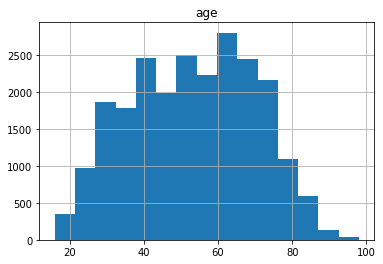

In [8]:
d2.hist(column="age", bins=15)
plt.show()

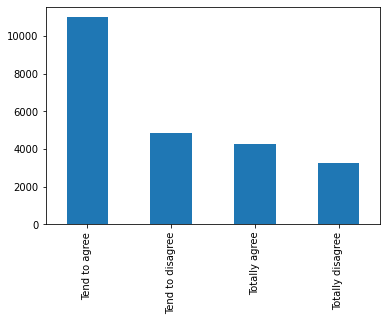

In [9]:
d2["support_refugees"].value_counts().plot(
    kind="bar")
plt.show()

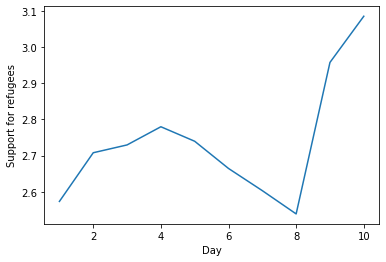

In [10]:
support_refugees = (d2.groupby(["date_n"])
                    ["support_refugees_n"].mean())
support_refugees = support_refugees.to_frame()

plt.plot(support_refugees.index, 
         support_refugees["support_refugees_n"])
plt.xlabel("Day")
plt.ylabel("Support for refugees")
plt.show()

In [11]:
#Combine the figures using function subplots()
#fig, (ax1, ax2) = plt.subplots(1,2)
#plt.subplots_adjust(wspace=0.5)
#ax1.plot(mean_support_refugees_by_day.index, mean_support_refugees_by_day["support_refugees_n"], marker="o")
#ax1.set(xlabel="Day", ylabel="Support to refugees")
#ax2.plot(mean_support_refugees_by_day.index, mean_support_refugees_by_day["support_refugees_n"], marker="o")
#ax2.set(xlabel="Day", ylabel="Support to migrants")
#plt.show()

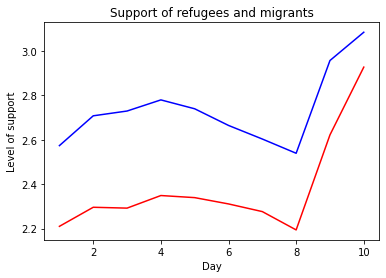

In [12]:
# Combine data
support_combined = d2.groupby(["date_n"]).agg(
    refugees = ("support_refugees_n", "mean"),
    migrants = ("support_migrants_n", "mean"))


#plot
sns.lineplot(x="date_n", y="refugees", 
             data=support_combined, color="blue")
sns.lineplot(x="date_n", y="migrants", 
             data=support_combined, color="red")
plt.xlabel("Day")
plt.ylabel("Level of support")
plt.title("Support of refugees and migrants") 
plt.show()

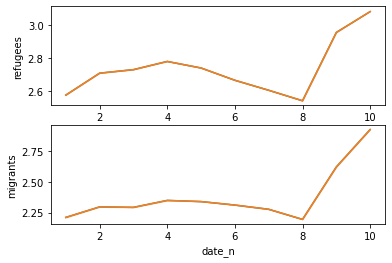

In [13]:
f, axes = plt.subplots(2,1)
sns.lineplot(x="date_n", y="refugees", 
             data=support_combined, ax=axes[0])
sns.lineplot(x="date_n", y="migrants", 
             data=support_combined, ax=axes[1])

sns.lineplot(x="date_n", y="support_refugees_n", 
             data=d2, ci=0, ax=axes[0])
sns.lineplot(x="date_n", y="support_migrants_n", 
             data=d2, ci=0, ax=axes[1])
plt.show()

<AxesSubplot:xlabel='refugees', ylabel='migrants'>

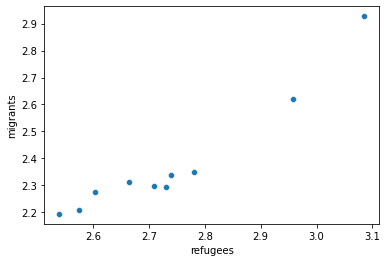

In [14]:
sns.scatterplot(data=support_combined, 
                x="refugees", y="migrants")

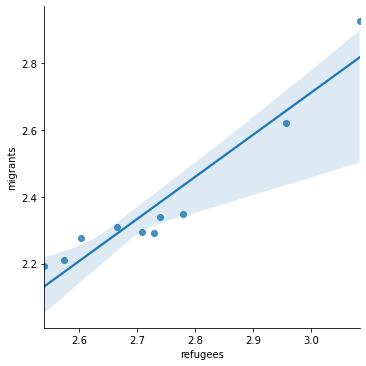

In [15]:
sns.lmplot(data=support_combined, 
           x="refugees", y="migrants")
plt.show()

In [16]:
print(support_combined["refugees"]
      .corr(support_combined["migrants"], 
            method="pearson"))

0.9541243084907629


In [17]:
pivot_data = pd.pivot_table(d2, 
  values="support_refugees_n", 
  index=["country"], columns="gender")

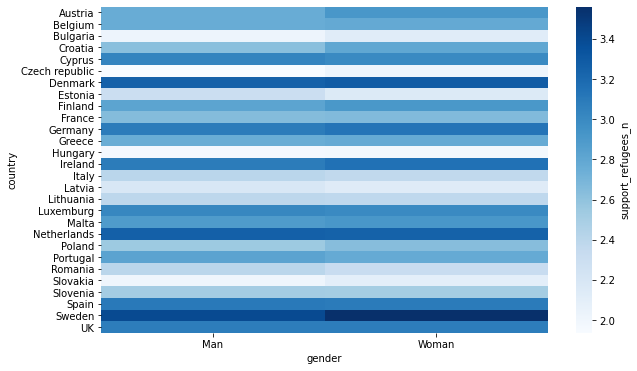

In [18]:
plt.figure(figsize=(10,6))
sns.heatmap(pivot_data, cmap="Blues", 
  cbar_kws={"label": "support_refugees_n"}) 
plt.show()

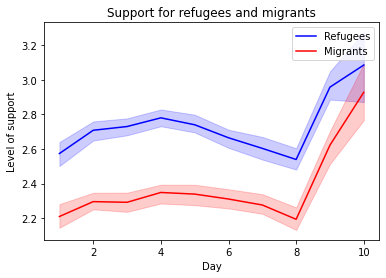

In [19]:
sns.lineplot(x="date_n", y="support_refugees_n", 
  data=d2, color="blue", ci=100, label="Refugees")
sns.lineplot(x="date_n", y="support_migrants_n", 
  data=d2, color="red", ci=100, label="Migrants")
plt.xlabel("Day")
plt.ylabel("Level of support")
plt.title("Support for refugees and migrants") 
plt.show()

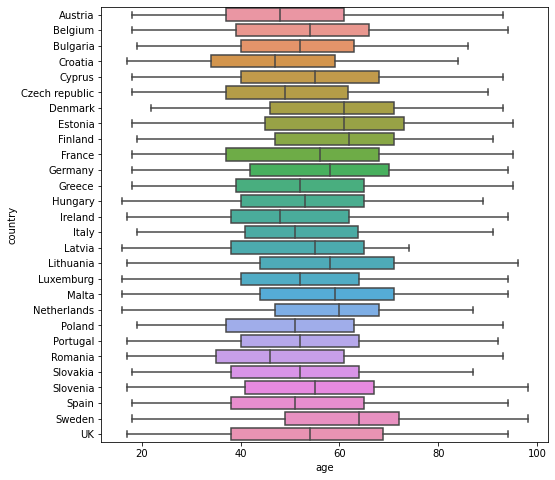

In [20]:
d2 = d2.sort_values(by ="country" )
plt.figure(figsize=(8,8))
sns.boxplot(x="age", y="country", data=d2)
plt.show()

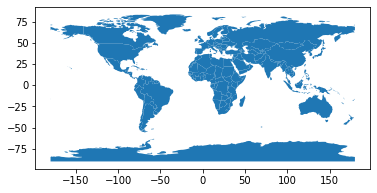

In [21]:
supports_country = (d2.groupby(["country"])
  ["support_refugees_n"].mean()
  .to_frame().reset_index())

#Load a world map and plot it
wmap = gpd.read_file(
    gpd.datasets.get_path("naturalearth_lowres"))
wmap = wmap.rename(columns={"name": "country"})
wmap.plot();

In [22]:
countries = [
  "Portugal", "Spain", "France", "Germany",
  "Austria", "Belgium", "Netherlands", "Ireland",
  "Denmark", "Poland", "UK", "Latvia", "Cyprus",
  "Croatia", "Slovenia", "Hungary", "Slovakia",
  "Czech republic", "Greece", "Finland", "Italy",
  "Luxemburg", "Sweden", "Sweden", "Bulgaria", 
  "Estonia", "Lithuania", "Malta", "Romania"]
m = wmap.loc[
    wmap["country"].isin(countries)]
m = pd.merge(supports_country, m, on="country")


Text(0.5, 1.0, 'Support of refugees by country')

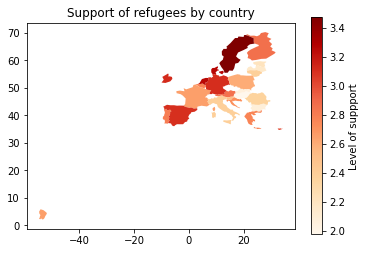

In [23]:
m = gpd.GeoDataFrame(m, geometry=m["geometry"])
m.plot(column="support_refugees_n", 
  legend=True, cmap="OrRd",
  legend_kwds={"label": "Level of suppport"}
).set_title("Support of refugees by country")

### 8.3 Clustering and dimensionality reduction

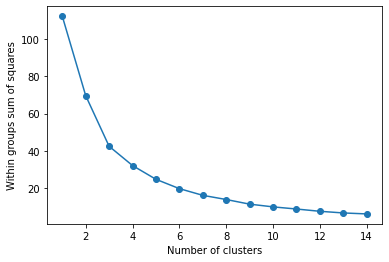

In [24]:
# Average variables by country and scale
d3 = d2.groupby(["country"])[[
    "support_refugees_n", 
    "support_migrants_n", 
    "age", 
    "educational_n"]].mean()

scaler = StandardScaler()
d3_s = scaler.fit_transform(d3) 

# Store sum of squares for 1..15 clusters
wss = []
for i in range(1, 15):
    km_out = KMeans(n_clusters=i, n_init=20)
    km_out.fit(d3_s)
    wss.append(km_out.inertia_)
  
plt.plot(range(1, 15), wss, marker="o")
plt.xlabel("Number of clusters")
plt.ylabel("Within groups sum of squares")
plt.show()

In [25]:
# Compute k-means with k = 3
km_res = KMeans(n_clusters=3, n_init=25).fit(d3_s)
print(km_res)
print("K-means cluste sizes:",  
  np.bincount(km_res.labels_[km_res.labels_>=0]))
print(f"Cluster means: {km_res.cluster_centers_}")
print("Clustering vector:")
print(np.column_stack((d3.index, km_res.labels_)))
print("Within cluster sum of squares:")
print(km_res.inertia_)

KMeans(n_clusters=3, n_init=25)
K-means cluste sizes: [13  3 12]
Cluster means: [[-0.89000978 -0.82574663 -0.3892184  -0.21560025]
 [ 1.2101425   1.01720791  1.78536032  2.49604445]
 [ 0.66164163  0.64025687 -0.02468681 -0.39044418]]
Clustering vector:
[['Austria' 2]
 ['Belgium' 2]
 ['Bulgaria' 0]
 ['Croatia' 0]
 ['Cyprus' 2]
 ['Czech republic' 0]
 ['Denmark' 1]
 ['Estonia' 0]
 ['Finland' 1]
 ['France' 2]
 ['Germany' 2]
 ['Greece' 0]
 ['Hungary' 0]
 ['Ireland' 2]
 ['Italy' 0]
 ['Latvia' 0]
 ['Lithuania' 0]
 ['Luxemburg' 2]
 ['Malta' 2]
 ['Netherlands' 2]
 ['Poland' 0]
 ['Portugal' 2]
 ['Romania' 0]
 ['Slovakia' 0]
 ['Slovenia' 0]
 ['Spain' 2]
 ['Sweden' 1]
 ['UK' 2]]
Within cluster sum of squares:
42.50488485460034


No handles with labels found to put in legend.


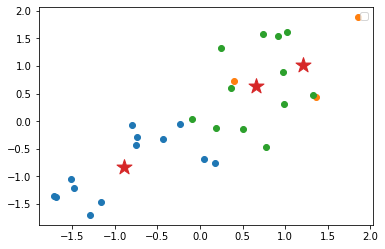

In [26]:
for cluster in range(km_res.n_clusters):
  plt.scatter(d3_s[km_res.labels_ == cluster, 0], 
              d3_s[km_res.labels_ == cluster, 1])
plt.scatter(km_res.cluster_centers_[:, 0], 
            km_res.cluster_centers_[:, 1], 
            s=250, marker="*")
plt.legend(scatterpoints=1)
plt.show()

In [27]:
hc_res = AgglomerativeClustering(
    affinity = "euclidean", linkage = "complete") 
hc_res.fit_predict(d3_s)
print(hc_res)

AgglomerativeClustering(linkage='complete')


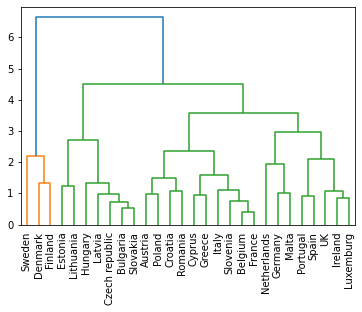

In [28]:
dendrogram = sch.dendrogram(
    sch.linkage(d3_s, method="complete"), 
    labels=list(d3.index), leaf_rotation=90) 

In [29]:
hc_res = AgglomerativeClustering(n_clusters=3, 
  affinity = "euclidean", linkage = "ward")
hc_res.fit_predict(d3_s)
print(hc_res)

AgglomerativeClustering(n_clusters=3)


No handles with labels found to put in legend.


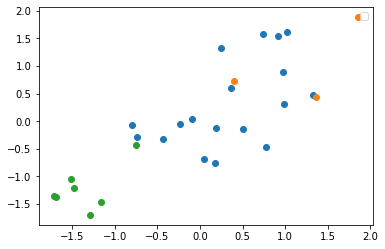

In [30]:
for cluster in range(hc_res.n_clusters):
    plt.scatter(d3_s[hc_res.labels_==cluster, 0], 
                d3_s[hc_res.labels_==cluster, 1])
plt.legend(scatterpoints=1)
plt.show()

In [31]:
pca_m = PCA()
pca = pca_m.fit(d3_s)
pca_n = PCA()
pca = pca_n.fit_transform(d3_s)
pca_df = pd.DataFrame(data=pca, 
  columns=["PC1", "PC2", "PC3", "PC4"])
pca_df.index = d3.index
print(pca_df.head())

pca_df_2 = pd.DataFrame(data=pca_n.components_.T, 
  columns=["PC1", "PC2", "PC3", "PC4"])
pca_df_2.index = d3.columns
print(pca_df_2)

               PC1       PC2       PC3       PC4
country                                         
Austria  -0.103285 -1.220018 -0.535673  0.066888
Belgium  -0.029355 -0.084707  0.051515  0.227609
Bulgaria -1.660518  0.949533 -0.480337 -0.151837
Croatia  -1.267502 -0.819093 -0.920657  0.843682
Cyprus    0.060590 -0.195928  0.573670  0.812519
                         PC1       PC2       PC3       PC4
support_refugees_n  0.573292 -0.369010  0.139859  0.718058
support_migrants_n  0.513586 -0.533140 -0.094283 -0.665659
age                 0.445117  0.558601  0.670994 -0.199005
educational_n       0.457642  0.517261 -0.722023  0.041073


findfont: Font family ['Arial'] not found. Falling back to DejaVu Sans.


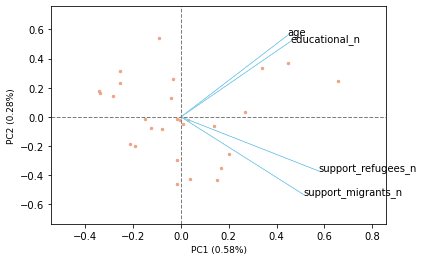

In [32]:
var1 = round(pca_n.explained_variance_ratio_[0],2)
var2 = round(pca_n.explained_variance_ratio_[1],2)
bioinfokit.visuz.cluster.biplot(cscore=pca, 
  loadings=pca_n.components_, 
  labels=pca_df_2.index.values, 
  var1=var1, var2=var2, show=True)

In [33]:
print("Proportion of variance explained:")
print(pca_n.explained_variance_ratio_)

Proportion of variance explained:
[0.57848569 0.27974794 0.10344996 0.03831642]


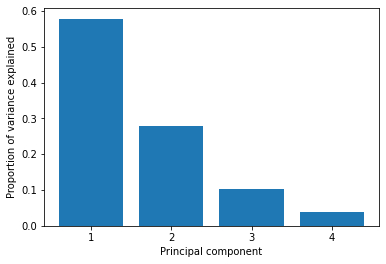

In [34]:
plt.bar([1,2,3,4],pca_n.explained_variance_ratio_)
plt.ylabel("Proportion of variance explained")
plt.xlabel("Principal component")
plt.xticks([1,2,3,4])
plt.show()

In [35]:
cvar = np.cumsum(pca_n.explained_variance_ratio_)
cvar 

array([0.57848569, 0.85823362, 0.96168358, 1.        ])

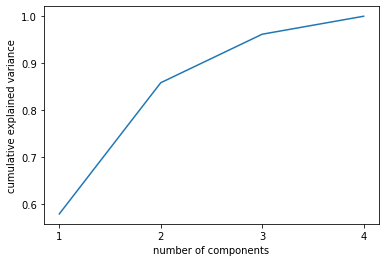

In [36]:
plt.plot(cvar)
plt.xlabel("number of components")
plt.xticks(np.arange(len(cvar)), 
           np.arange(1, len(cvar)+1))
plt.ylabel("cumulative explained variance") 
plt.show()

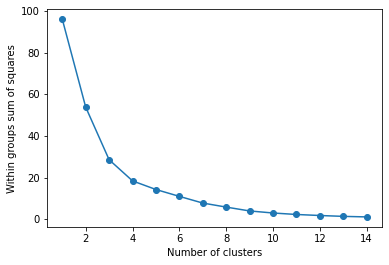

No handles with labels found to put in legend.


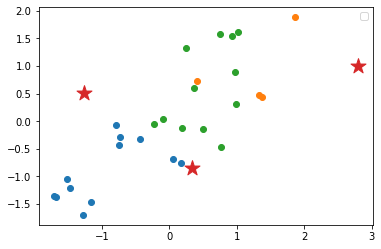

In [37]:
#Generate a new dataset with first components
d5 = pca[:,0:2]
d5[0:5]

#Get optimal number of clusters
wss = []
for i in range(1, 15):
    km_out = KMeans(n_clusters=i, n_init=20)
    km_out.fit(d5)
    wss.append(km_out.inertia_)

    
# Plot sum of squares vs. number of clusters
plt.plot(range(1, 15), wss, marker="o")
plt.xlabel("Number of clusters")
plt.ylabel("Within groups sum of squares")
plt.show()

# Compute again with k = 3 and visualize
km_res_5 = KMeans(n_clusters=3, n_init=25).fit(d5)
for cluster in range(km_res_5.n_clusters):
  plt.scatter(d3_s[km_res_5.labels_==cluster, 0], 
              d3_s[km_res_5.labels_==cluster, 1])
plt.scatter(km_res_5.cluster_centers_[:, 0], 
            km_res_5.cluster_centers_[:, 1], 
            s=250, marker="*")
plt.legend(scatterpoints=1)
plt.show()